# Set up

## Install

In [1]:
import numpy as np
from matplotlib import pyplot

In [2]:
!pip install qiskit qiskit-ibm-runtime qiskit-ibm-provider

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.3/343.3 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.3/157.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.7/60.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/13

In [3]:
import qiskit
import qiskit_ibm_runtime
import qiskit_ibm_provider

print(qiskit.__version__)
print(qiskit_ibm_runtime.__version__)
print(qiskit_ibm_provider.__version__)

1.2.0
0.29.0
0.11.0


<ipython-input-3-30669515e20f>:3: DeprecationWarning: The package qiskit_ibm_provider is being deprecated. Please see https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime to get instructions on how to migrate to qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  import qiskit_ibm_provider


To be able to use the runtime client, we need API token, which in turn we need to hook up with IBM Quantum Channel.

## Set up an IBM Quantum channel

For accessing a IBM's real QC

https://docs.quantum.ibm.com/guides/setup-channel

* Register for IBM id or log in if you already have one:

https://quantum.ibm.com/login

  Recall: IBM id is your registered email.


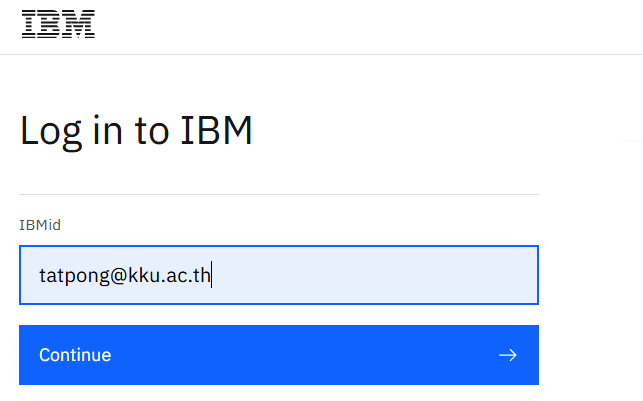

## Get IBM Quantum token

To use IBM's QC, we need a token, ```API Token```.

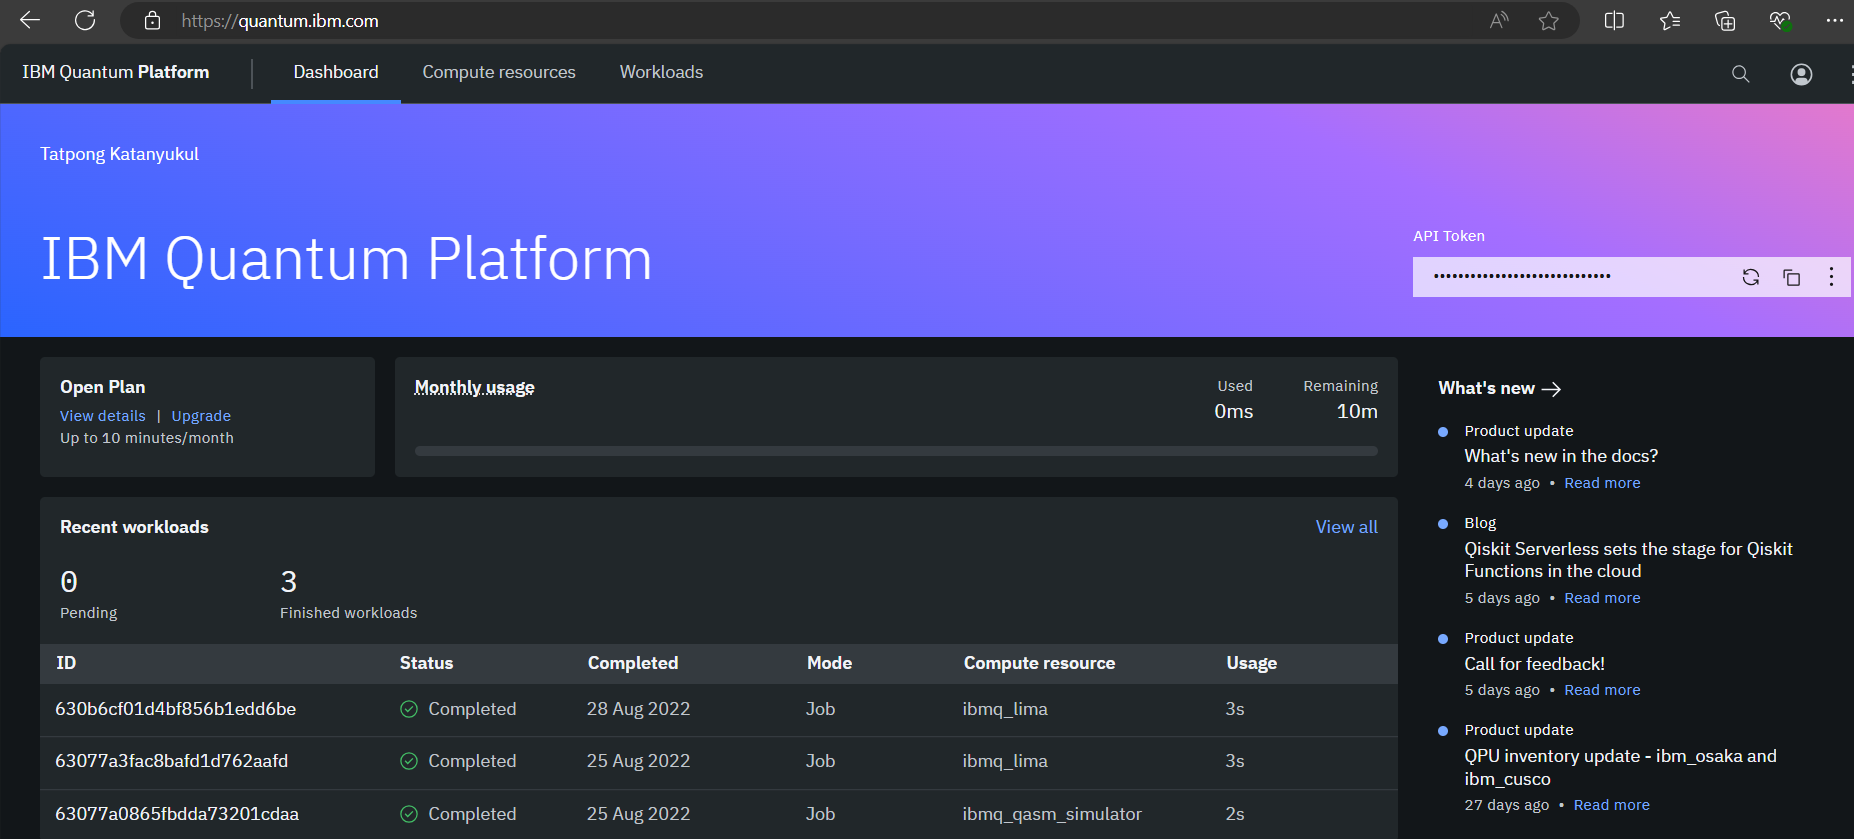

## Authenticate

> Authenticate to the service by calling ```QiskitRuntimeService``` with your IBM Quantum API key and CRN.

In [4]:
from qiskit_ibm_runtime import QiskitRuntimeService

#service = QiskitRuntimeService(channel="ibm_quantum", token=<Your API Token>)

# OR

# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token=<Your API Token>,
    set_as_default=True,
    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)

# Load saved credentials
service = QiskitRuntimeService()

## Test the set up

In [5]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit, transpile

from qiskit_ibm_runtime import SamplerV2 as Sampler

from qiskit.visualization import plot_histogram



Qiskit patterns:

1. Create circuit

2. Transpile

3. Execute

4. Read result

In [8]:
# 1. Create circuit
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()

circ.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

In [9]:
# We'll need to specify the credentials when initializing QiskitRuntimeService,
# if they were not previously saved.
backend = service.least_busy(operational=True, simulator=False)

# 2. Transpile using the transpile function directly
transpiled_circ = transpile(circ, backend=backend, optimization_level=1)

In [10]:
transpiled_circ.draw()

global phase: 7π/4
                    ┌────────┐ ┌────┐          ┌──────┐┌──────────┐┌────┐»
          q_0 -> 0 ─┤ Rz(-π) ├─┤ √X ├──────────┤1     ├┤ Rz(-π/2) ├┤ √X ├»
                   ┌┴────────┴┐├────┤┌────────┐│  Ecr │├─────────┬┘├────┤»
          q_1 -> 1 ┤ Rz(-π/2) ├┤ √X ├┤ Rz(-π) ├┤0     ├┤ Rz(π/2) ├─┤ √X ├»
                   └──────────┘└────┘└────────┘└──────┘└─────────┘ └────┘»
    ancilla_0 -> 2 ──────────────────────────────────────────────────────»
                                                                         »
    ancilla_1 -> 3 ──────────────────────────────────────────────────────»
                                                                         »
    ancilla_2 -> 4 ──────────────────────────────────────────────────────»
                                                                         »
    ancilla_3 -> 5 ──────────────────────────────────────────────────────»
                                                                         »
    ancilla_4 -> 6 ──────────────────────────────────────────────────────»
                                                                         »
    ancilla_5 -> 7 ──────────────────────────────────────────────────────»
                                                                         »
    ancilla_6 -> 8 ──────────────────────────────────────────────────────»
                                                                         »
    ancilla_7 -> 9 ──────────────────────────────────────────────────────»
                                                                         »
   ancilla_8 -> 10 ──────────────────────────────────────────────────────»
                                                                         »
   ancilla_9 -> 11 ──────────────────────────────────────────────────────»
                                                                         »
  ancilla_10 -> 12 ──────────────────────────────────────────────────────»
                                                                         »
  ancilla_11 -> 13 ──────────────────────────────────────────────────────»
                                                                         »
  ancilla_12 -> 14 ──────────────────────────────────────────────────────»
                                                                         »
  ancilla_13 -> 15 ──────────────────────────────────────────────────────»
                                                                         »
  ancilla_14 -> 16 ──────────────────────────────────────────────────────»
                                                                         »
  ancilla_15 -> 17 ──────────────────────────────────────────────────────»
                                                                         »
  ancilla_16 -> 18 ──────────────────────────────────────────────────────»
                                                                         »
  ancilla_17 -> 19 ──────────────────────────────────────────────────────»
                                                                         »
  ancilla_18 -> 20 ──────────────────────────────────────────────────────»
                                                                         »
  ancilla_19 -> 21 ──────────────────────────────────────────────────────»
                                                                         »
  ancilla_20 -> 22 ──────────────────────────────────────────────────────»
                                                                         »
  ancilla_21 -> 23 ──────────────────────────────────────────────────────»
                                                                         »
  ancilla_22 -> 24 ──────────────────────────────────────────────────────»
                                                                         »
  ancilla_23 -> 25 ──────────────────────────────────────────────────────»
                                                                         »
  anci

In [ ]:
sampler = Sampler(backend)

# 3. Execute
job = sampler.run([transpiled_circ])
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")


>>> Job ID: cvg5d7c8w2g0008ejf4g
>>> Job Status: QUEUED


Check out status

https://quantum.ibm.com/

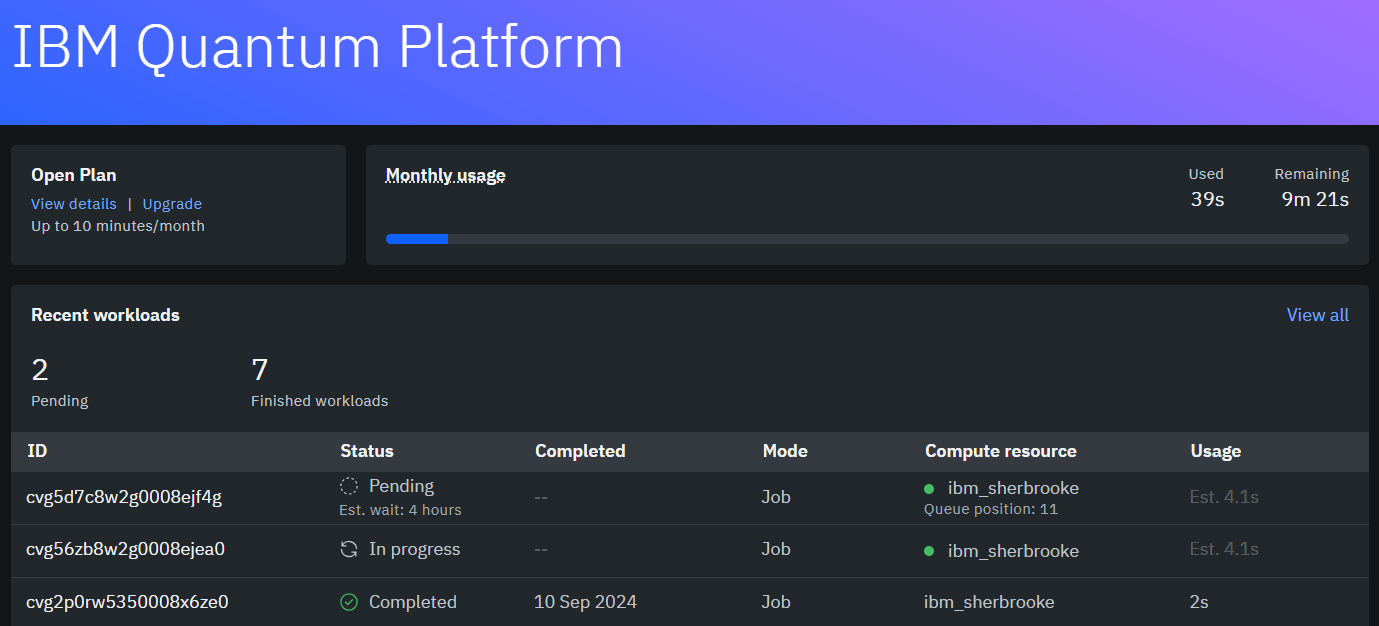

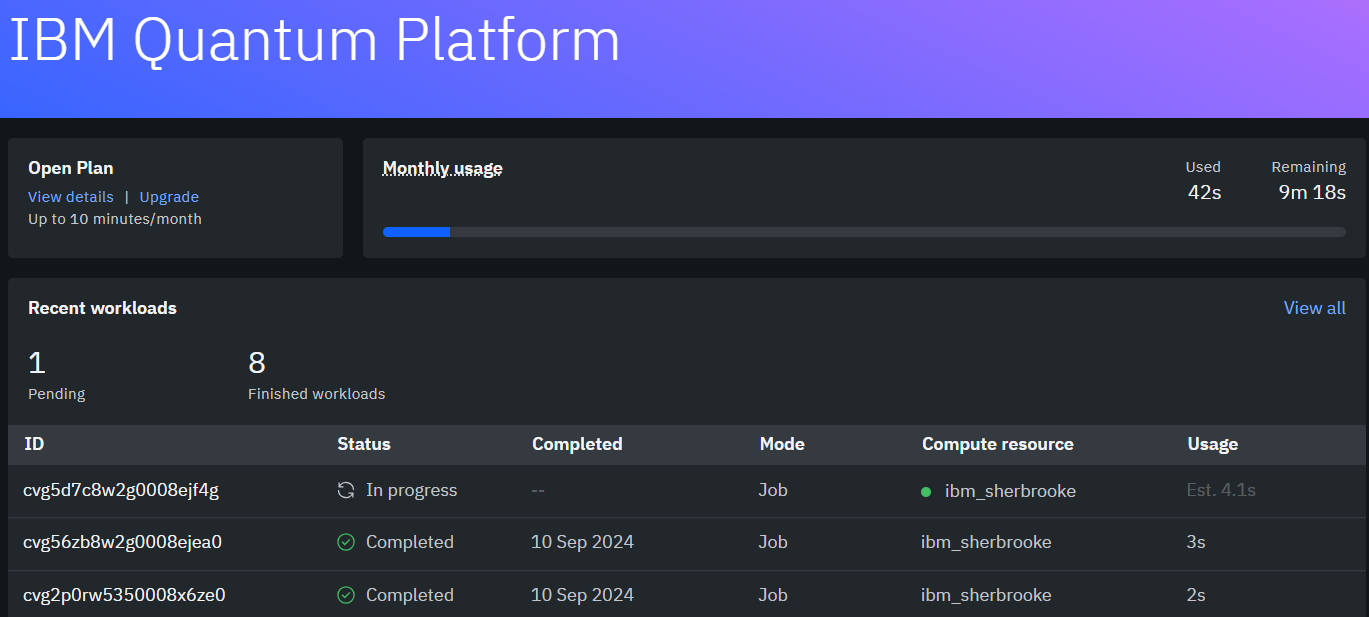

### Read the result

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token=<Your API Token>
)
job = service.job('cvg5d7c8w2g0008ejf4g')
job_result = job.result()

# To get counts for a particular pub result, use
#
# pub_result = job_result[<idx>].data.<classical register>.get_counts()
#
# where <idx> is the index of the pub and <classical register> is the name of the classical register.
# You can use circuit.cregs to find the name of the classical registers.

In [ ]:
job_result[0].data.meas.get_counts()

{'11': 1863, '00': 2021, '01': 130, '10': 82}

We have entangled two qubits together:
they should be either '00' or '11'.

The other results are obviously errors.

# Runtime: fake provider

> When you run your quantum program on a real device, your workload must wait in a queue before it runs. To save time, you can instead use the following code to run this small workload on the [fake_provider](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/fake_provider) with the Qiskit Runtime local testing mode. Note that this is only possible for a small circuit. When you scale up in the next section, you will need to use a real device.

In [11]:
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
backend = FakeAlmadenV2()

# 2. Transpile using the transpile function directly
transpiled_circ = transpile(circ, backend=backend, optimization_level=1)

In [12]:
transpiled_circ.draw()

┌─────────┐      ░ ┌─┐   
        q_0 -> 0 ┤ U2(0,π) ├──■───░─┤M├───
                 └─────────┘┌─┴─┐ ░ └╥┘┌─┐
        q_1 -> 1 ───────────┤ X ├─░──╫─┤M├
                            └───┘ ░  ║ └╥┘
  ancilla_0 -> 2 ────────────────────╫──╫─
                                     ║  ║ 
  ancilla_1 -> 3 ────────────────────╫──╫─
                                     ║  ║ 
  ancilla_2 -> 4 ────────────────────╫──╫─
                                     ║  ║ 
  ancilla_3 -> 5 ────────────────────╫──╫─
                                     ║  ║ 
  ancilla_4 -> 6 ────────────────────╫──╫─
                                     ║  ║ 
  ancilla_5 -> 7 ────────────────────╫──╫─
                                     ║  ║ 
  ancilla_6 -> 8 ────────────────────╫──╫─
                                     ║  ║ 
  ancilla_7 -> 9 ────────────────────╫──╫─
                                     ║  ║ 
 ancilla_8 -> 10 ────────────────────╫──╫─
                                     ║  ║ 
 ancilla_9 -> 11 ────────────────────╫──╫─
                                     ║  ║ 
ancilla_10 -> 12 ────────────────────╫──╫─
                                     ║  ║ 
ancilla_11 -> 13 ────────────────────╫──╫─
                                     ║  ║ 
ancilla_12 -> 14 ────────────────────╫──╫─
                                     ║  ║ 
ancilla_13 -> 15 ────────────────────╫──╫─
                                     ║  ║ 
ancilla_14 -> 16 ────────────────────╫──╫─
                                     ║  ║ 
ancilla_15 -> 17 ────────────────────╫──╫─
                                     ║  ║ 
ancilla_16 -> 18 ────────────────────╫──╫─
                                     ║  ║ 
ancilla_17 -> 19 ────────────────────╫──╫─
                                     ║  ║ 
         meas: 2/════════════════════╩══╩═
                                     0  1

In [13]:
sampler = Sampler(backend)

# 3. Execute
job = sampler.run([transpiled_circ])
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: ea47a4ce-fee5-472a-af44-00d36902e58c
>>> Job Status: JobStatus.RUNNING


/usr/local/lib/python3.10/dist-packages/qiskit_ibm_runtime/fake_provider/fake_backend.py:468: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


In [14]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [15]:
# 4. Read result

result = job.result()

In [18]:
result[0].data.meas.get_counts()

{'00': 522, '11': 502}

# Grover search

In [ ]:
from qiskit import *

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler


## Oracle

In [ ]:
# Define the oracle.
# Let's do 2 qubits.

oracle = QuantumCircuit(2, name='oracle')
oracle.cz(0,1)
oracle.to_gate() # Make a gate named 'oracle'
oracle.draw()

q_0: ─■─
      │ 
q_1: ─■─

## Reflection operator

In [ ]:
# Reflection
reflection = QuantumCircuit(2, name='reflection')
reflection.h([0,1]) # To bring back our original |00> state
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1]) # Transform it back
reflection.to_gate()

reflection.draw()

┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ Z ├─■─┤ H ├
     ├───┤├───┤ │ ├───┤
q_1: ┤ H ├┤ Z ├─■─┤ H ├
     └───┘└───┘   └───┘

## Apply Grover search algorithm

In [ ]:
# 1. Map a problem

grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle, [0,1])
grover_circ.append(reflection, [0,1])
grover_circ.measure([0,1], [0,1])

grover_circ.draw()

┌───┐┌─────────┐┌─────────────┐┌─┐   
q_0: ┤ H ├┤0        ├┤0            ├┤M├───
     ├───┤│  oracle ││  reflection │└╥┘┌─┐
q_1: ┤ H ├┤1        ├┤1            ├─╫─┤M├
     └───┘└─────────┘└─────────────┘ ║ └╥┘
c: 2/════════════════════════════════╩══╩═
                                     0  1

In [ ]:
# 2. Transpile to a specific hardware

service = QiskitRuntimeService(channel="ibm_quantum", token=<Your API Token>)
backend = service.least_busy(operational=True, simulator=False)

transpiled_circ = transpile(circ, backend=backend, optimization_level=1)

In [ ]:
sampler = Sampler(backend)

# 3. Execute
job = sampler.run([transpiled_circ])
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")


>>> Job ID: cvg5nyzvawwg0089at70
>>> Job Status: QUEUED


In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token=<Your API Token>
)
job = service.job('cvg5nyzvawwg0089at70')
job_result = job.result()

# To get counts for a particular pub result, use
#
# pub_result = job_result[<idx>].data.<classical register>.get_counts()
#
# where <idx> is the index of the pub and <classical register> is the name of the classical register.
# You can use circuit.cregs to find the name of the classical registers.

In [ ]:
job_result[0].data.meas.get_counts()

{'00': 2053, '11': 1886, '01': 107, '10': 50}